In [41]:
from shapely import intersection, union, normalize, simplify, make_valid
from shapely.geometry import Polygon
from shapely.plotting import plot_polygon, plot_points, plot_line
from shapely.wkt import loads
import matplotlib.pyplot as plt
def compare(p1, p2):
    plt.plot(*p1.exterior.xy)
    plt.plot(*p2.exterior.xy)
    # plot_polygon(p1)
    # plot_polygon(p2)
    print(p1.area, p2.area)
    print(p1.is_valid, p2.is_valid)
    print(f"{p1.intersects(p2)=}")
    print(f"{p1.overlaps(p2)=}")
    print(f"{p1.crosses(p2)=}")
    print(f"{p1.covers(p2)=}")
    print(f"{p1.covered_by(p2)=}")
    print(f"{p1.intersection(p2).area=}")

def try_fix(p1):
    print(f"{p1.is_valid}")
    if p1.is_valid:
        print("No need to fix")
        return [p1]
    p2 = make_valid(p1)
    print(f"{p2}")
    if p2.geom_type == 'MultiPolygon':
        print("Fixed by splitting")
        return [*p2.geoms]
    elif p2.geom_type == 'GeometryCollection':
        return [x for x in p2.geoms if x.geom_type == 'Polygon']
    else:
        print(f"Don't know how to fix {p2.geom_type}: {p2}")
    return []

57.0 2.0
True True
p1.intersects(p2)=True
p1.overlaps(p2)=False
p1.crosses(p2)=False
p1.covers(p2)=False
p1.covered_by(p2)=False
p1.intersection(p2).area=0.0


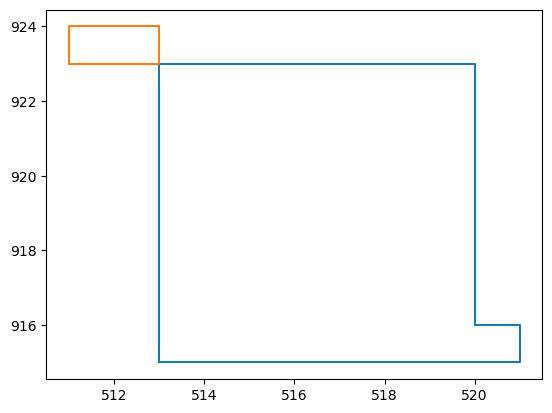

In [2]:
p1 = loads("POLYGON ((513 915, 513 923, 520 923, 520 916, 521 916, 521 915, 520 915, 519 915, 513 915))")
p2 = loads("POLYGON ((511 923, 513 923, 513 924, 511 924, 511 923))")
compare(p1, p2)

117.0 0.0
True False
p1.intersects(p2)=True
p1.overlaps(p2)=True
p1.crosses(p2)=False
p1.covers(p2)=False
p1.covered_by(p2)=False
p1.intersection(p2).area=0.0


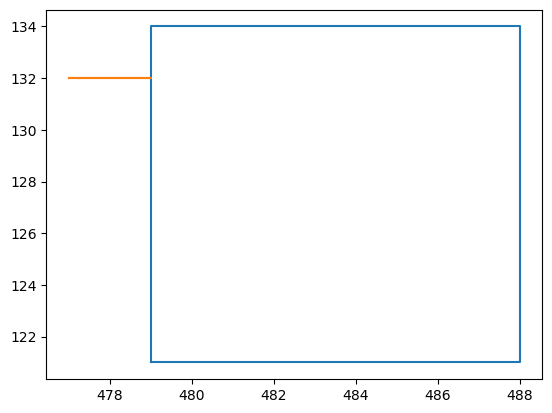

In [3]:
p1 = loads("POLYGON ((479 121, 488 121, 488 134, 479 134, 479 121))")
p2 = loads("POLYGON ((477 132, 479 132, 479 132, 477 132))")
p2 = normalize(p2)
compare(p1, p2)

328.0 1184.0
False True
p1.intersects(p2)=True
p1.overlaps(p2)=True
p1.crosses(p2)=False
p1.covers(p2)=False
p1.covered_by(p2)=False
p1.intersection(p2).area=304.5


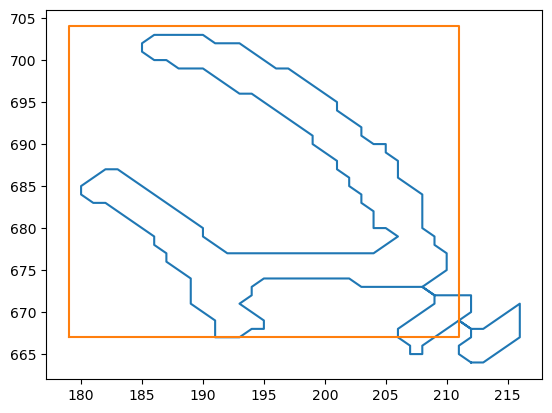

In [4]:
p1 = loads("POLYGON ((212 664, 211 665, 211 666, 212 667, 212 668, 211 669, 208 666, 208 665, 207 665, 207 666, 206 667, 206 668, 209 671, 209 672, 208 673, 203 673, 202 674, 195 674, 194 673, 194 672, 193 671, 195 669, 195 668, 194 668, 193 667, 191 667, 191 669, 189 671, 189 674, 187 676, 187 677, 186 678, 186 679, 182 683, 181 683, 180 684, 180 685, 182 687, 183 687, 190 680, 190 679, 192 677, 204 677, 206 679, 205 680, 204 680, 204 682, 203 683, 203 684, 202 685, 202 686, 201 687, 201 688, 199 690, 199 691, 194 696, 193 696, 190 699, 188 699, 187 700, 186 700, 185 701, 185 702, 186 703, 190 703, 191 702, 193 702, 196 699, 197 699, 201 695, 201 694, 203 692, 203 691, 204 690, 205 690, 205 689, 206 688, 206 686, 208 684, 208 680, 209 679, 209 678, 210 677, 210 675, 208 673, 209 672, 212 672, 212 670, 211 669, 212 668, 213 668, 216 671, 216 667, 213 664, 212 664))")
p2 = loads("POLYGON ((179 667, 211 667, 211 704, 179 704, 179 667))")
compare(p1, p2)

770.0 770.0
True True
p1.intersects(p2)=True
p1.overlaps(p2)=False
p1.crosses(p2)=False
p1.covers(p2)=True
p1.covered_by(p2)=True
p1.intersection(p2).area=770.0


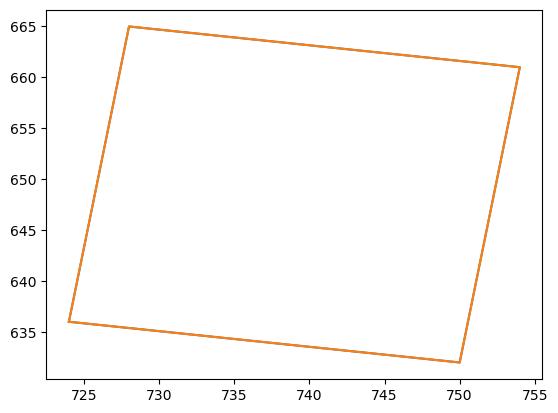

In [5]:
p1 = loads("POLYGON ((724 636, 750 632, 754 661, 728 665, 724 636))")
p2 = loads("POLYGON ((724 636, 750 632, 754 661, 728 665, 724 636))")
compare(p1, p2)

4692.0 4556.0
True True
p1.intersects(p2)=True
p1.overlaps(p2)=False
p1.crosses(p2)=False
p1.covers(p2)=True
p1.covered_by(p2)=False
p1.intersection(p2).area=4556.0


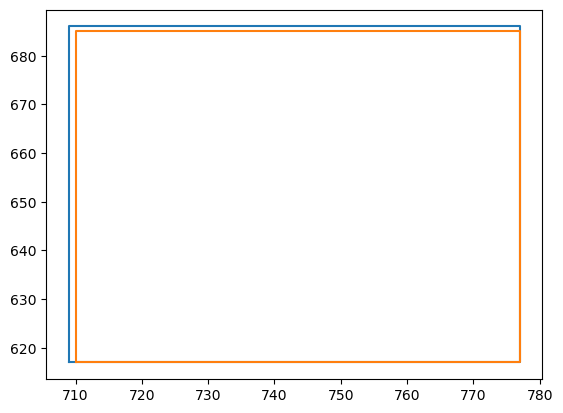

In [6]:
p1 = loads("POLYGON ((709 617, 777 617, 777 686, 709 686, 709 617))")
p2 = loads("POLYGON ((710 617, 777 617, 777 685, 710 685, 710 617))")
compare(p1, p2)

68.0 1782.0
False True
p1.intersects(p2)=True
p1.overlaps(p2)=False
p1.crosses(p2)=False
p1.covers(p2)=False
p1.covered_by(p2)=True
p1.intersection(p2).area=68.0


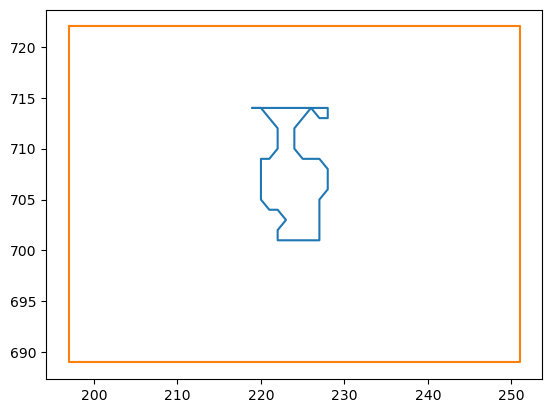

In [7]:
p1 = loads("POLYGON ((222 701, 222 702, 223 703, 222 704, 221 704, 220 705, 220 709, 221 709, 222 710, 222 712, 220 714, 219 714, 228 714, 228 713, 227 713, 226 714, 224 712, 224 710, 225 709, 227 709, 228 708, 228 706, 227 705, 227 701, 222 701))")
p2 = loads("POLYGON ((197 722, 197 689, 251 689, 251 722, 197 722))")
compare(normalize(p1), p2)

38.0 7169.0
False True
p1.intersects(p2)=True
p1.overlaps(p2)=False
p1.crosses(p2)=False
p1.covers(p2)=False
p1.covered_by(p2)=True
p1.intersection(p2).area=38.0


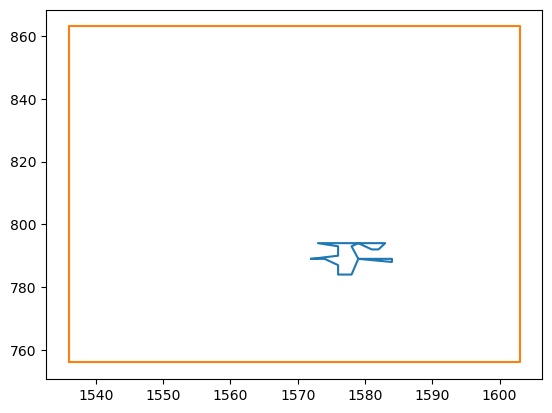

In [8]:

p1 = loads("POLYGON ((1572 789, 1574 789, 1576 787, 1576 784, 1578 784, 1578 788, 1579 789, 1580 789, 1581 788, 1584 788, 1584 789, 1579 789, 1578 790, 1578 793, 1579 794, 1581 792, 1582 792, 1583 793, 1583 794, 1573 794, 1573 793, 1574 794, 1575 794, 1576 793, 1576 790, 1575 789, 1572 789))")
p2 = loads("POLYGON ((1536 756, 1603 756, 1603 863, 1536 863, 1536 756))")
compare(simplify(p1, 1), p2)

26.5 33565.0
False True
p1.intersects(p2)=True
p1.overlaps(p2)=False
p1.crosses(p2)=False
p1.covers(p2)=False
p1.covered_by(p2)=True


GEOSException: TopologyException: side location conflict at 1364 967. This can occur if the input geometry is invalid.

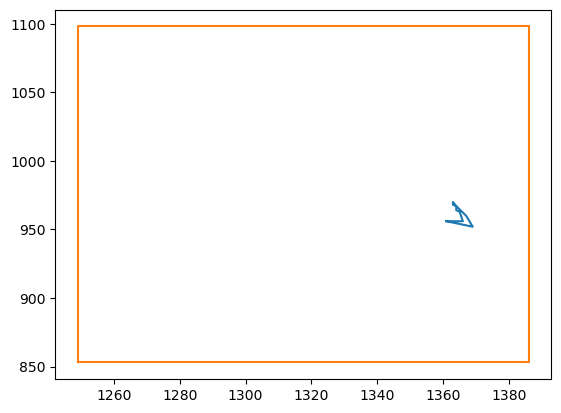

In [11]:

p1 = loads("POLYGON ((1361 956, 1366 956, 1365 963, 1364 964, 1364 967, 1363 970, 1363 968, 1364 967, 1367 960, 1369 952, 1361 956))")
p2 = loads("POLYGON ((1249 853, 1386 853, 1386 1098, 1249 1098, 1249 853))")
compare(simplify(p1, 3), p2)

685.5 1130.5
True True
p1.intersects(p2)=True
p1.overlaps(p2)=True
p1.crosses(p2)=False
p1.covers(p2)=False
p1.covered_by(p2)=False
p1.intersection(p2).area=658.1073957582053


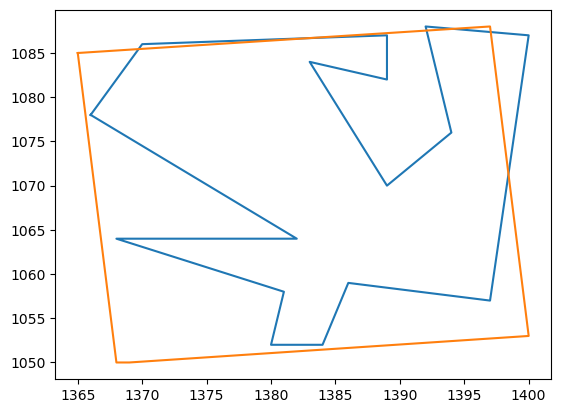

In [10]:

p1 = loads("POLYGON ((1366 1078, 1366 1082, 1370 1086, 1379 1086, 1383 1084, 1384 1086, 1389 1087, 1389 1082, 1385 1085, 1383 1084, 1387 1079, 1387 1071, 1389 1070, 1394 1076, 1394 1083, 1392 1088, 1395 1089, 1397 1086, 1400 1087, 1398 1087, 1397 1086, 1398 1077, 1396 1072, 1399 1072, 1401 1070, 1396 1062, 1397 1057, 1386 1059, 1384 1052, 1380 1052, 1381 1058, 1379 1060, 1369 1061, 1368 1064, 1382 1064, 1380 1066, 1373 1068, 1366 1078))")
p2 = loads("POLYGON ((1365 1085, 1397 1088, 1400 1053, 1369 1050, 1368 1050, 1368 1050, 1365 1085))")
compare(simplify(p1, 3), p2)

(<matplotlib.patches.PathPatch at 0x773744a2bf90>,
 <matplotlib.lines.Line2D at 0x773744a34750>)

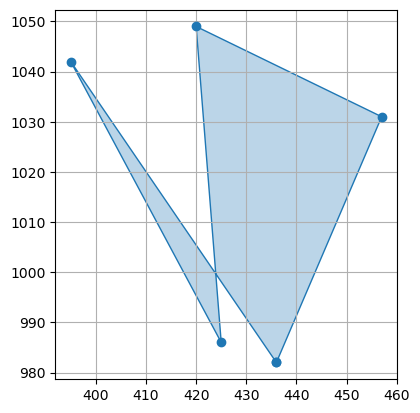

In [21]:

p1 = loads("POLYGON ((436 982, 395 1042, 425 986, 420 1049, 457 1031, 436 982))")
# p2 = loads("POLYGON ((1365 1085, 1397 1088, 1400 1053, 1369 1050, 1368 1050, 1368 1050, 1365 1085))")
plot_polygon(p1)

(<matplotlib.patches.PathPatch at 0x773744bc0750>,
 <matplotlib.lines.Line2D at 0x773744ce2610>)

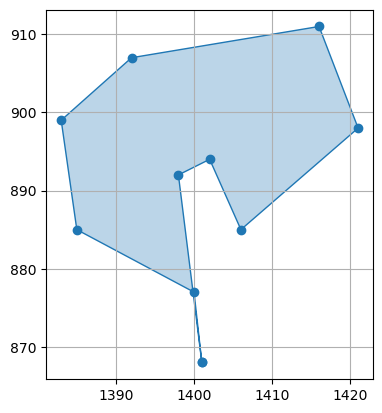

In [20]:

p1 = loads("POLYGON ((1401 868, 1400 877, 1385 885, 1383 899, 1392 907, 1416 911, 1421 898, 1406 885, 1402 894, 1398 892, 1401 868))")
# p2 = loads("POLYGON ((1365 1085, 1397 1088, 1400 1053, 1369 1050, 1368 1050, 1368 1050, 1365 1085))")
plot_polygon(p1)

(<matplotlib.patches.PathPatch at 0x773744b7b650>,
 <matplotlib.lines.Line2D at 0x773744b40450>)

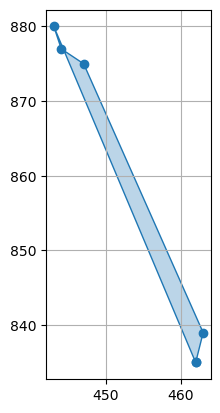

In [19]:

p1 = loads("POLYGON ((462 835, 443 880, 444 877, 447 875, 463 839, 462 835))")
# p2 = loads("POLYGON ((1365 1085, 1397 1088, 1400 1053, 1369 1050, 1368 1050, 1368 1050, 1365 1085))")
plot_polygon(p1)

False
MULTIPOLYGON (((22 378, 21 379, 19 378, 19 380, 16 382, 19 386, 16 388, 16 389, 18 390, 22 395, 26 393, 26 390, 27 389, 25 388, 27 385, 26 384, 26 379, 23 376, 21 377, 22 378)), ((29 388, 27 389, 28 390, 29 388)))
Fixed by splitting


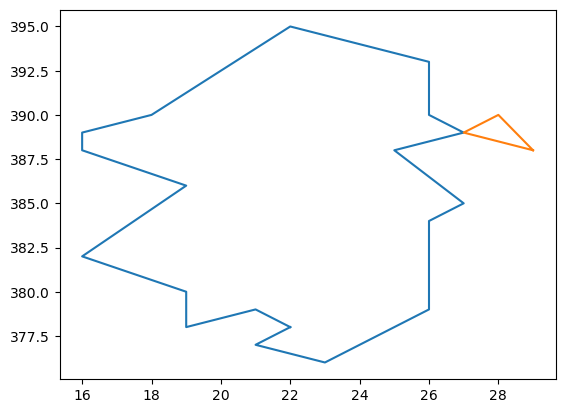

In [30]:

p1 = loads("POLYGON ((23 376, 21 377, 22 378, 21 379, 19 378, 19 380, 16 382, 19 386, 16 388, 16 389, 18 390, 22 395, 26 393, 26 390, 27 389, 28 390, 29 388, 27 389, 25 388, 27 385, 26 384, 26 379, 23 376))")
# p2 = loads("POLYGON ((1365 1085, 1397 1088, 1400 1053, 1369 1050, 1368 1050, 1368 1050, 1365 1085))")
# plot_polygon(p1)
for p in try_fix(p1):
    plt.plot(*p.exterior.xy)


(<matplotlib.patches.PathPatch at 0x773744ac57d0>,
 <matplotlib.lines.Line2D at 0x773744ac7a90>)

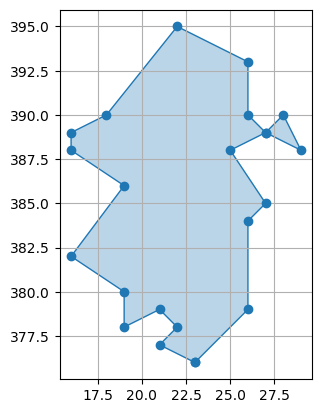

In [22]:

p1 = loads("POLYGON ((23 376, 21 377, 22 378, 21 379, 19 378, 19 380, 16 382, 19 386, 16 388, 16 389, 18 390, 22 395, 26 393, 26 390, 27 389, 28 390, 29 388, 27 389, 25 388, 27 385, 26 384, 26 379, 23 376))")
# p2 = loads("POLYGON ((1365 1085, 1397 1088, 1400 1053, 1369 1050, 1368 1050, 1368 1050, 1365 1085))")
plot_polygon(p1)

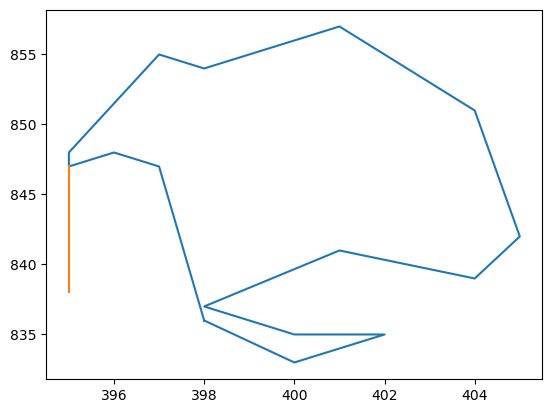

In [42]:

p1 = loads("GEOMETRYCOLLECTION (POLYGON ((398 836, 397 847, 396 848, 395 847, 395 848, 397 855, 398 854, 401 857, 404 851, 405 842, 404 839, 401 841, 398 837, 400 835, 402 835, 400 833, 398 836)), LINESTRING (395 847, 395 838))")
# p2 = loads("POLYGON ((1365 1085, 1397 1088, 1400 1053, 1369 1050, 1368 1050, 1368 1050, 1365 1085))")
# plot_points(p1)
for p in p1.geoms:
    if p.geom_type == 'Polygon':
        plt.plot(*p.exterior.xy)
    if p.geom_type == 'LineString':
        plt.plot(*p.coords.xy)

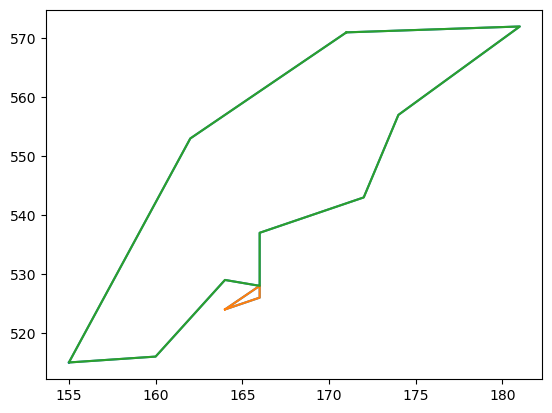

In [45]:

p1 = loads("POLYGON ((155 515, 162 553, 171 571, 181 572, 174 557, 172 543, 166 537, 166 526, 164 524, 166 528, 164 529, 160 516, 155 515))")
# p2 = loads("POLYGON ((1365 1085, 1397 1088, 1400 1053, 1369 1050, 1368 1050, 1368 1050, 1365 1085))")
# plot_points(p1)
plt.plot(*p1.exterior.xy)
p2 = make_valid(p1)
for p in p2.geoms:
    if p.geom_type == 'Polygon':
        plt.plot(*p.exterior.xy)
    if p.geom_type == 'LineString':
        plt.plot(*p.coords.xy)

15460.430422264877 15460.430422264877
True True
p1.intersects(p2)=True
p1.overlaps(p2)=False
p1.crosses(p2)=False
p1.covers(p2)=True
p1.covered_by(p2)=True
p1.intersection(p2).area=15460.430422264875


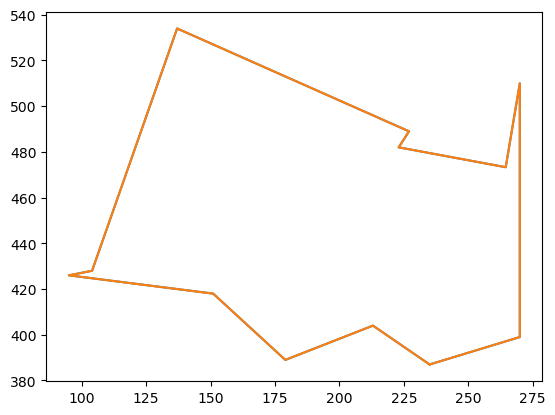

In [47]:

p1 = loads("POLYGON ((235 387, 213 404, 179 389, 151 418, 95 426, 104 428, 137 534, 227 489, 223 482, 264.53502879078695 473.3066218809981, 270 510, 270 399, 235 387), (263 463, 266 473, 264.53502879078695 473.3066218809981, 263 463))")
# p2 = loads("POLYGON ((1365 1085, 1397 1088, 1400 1053, 1369 1050, 1368 1050, 1368 1050, 1365 1085))")
# plot_points(p1)
# plt.plot(*p1.exterior.xy)
compare(p1, p1)

In [15]:
from shapely.geometry import LinearRing

# Create a square ring
coords = [(0, 0), (1, 0), (1, 1)]
ring = Polygon(coords)
print(f"{ring=}")

ring=<POLYGON ((0 0, 1 0, 1 1, 0 0))>
